In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostRegressor

In [2]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/phsm-severity-data.csv')
df.head()

,DATE_START,COUNTRY,ISO3,WHO_REGION,MASKS,TRAVEL,GATHERINGS,SCHOOLS,BUSINESSES,MOVEMENTS,GLOBAL_INDEX,MEASURES_IN_PLACE
0,2020-08-20,Yemen,YEM,EMRO,0,100,30,25,13,80,41,International travel restrictions (entry restr...
1,2020-09-04,Belarus,BLR,EURO,67,0,25,25,13,40,28,Mask wearing; Restrictions on movement and sta...
2,2021-03-13,Egypt,EGY,EMRO,100,33,50,25,67,100,62,Mask wearing; International travel restriction...
3,2020-10-18,Uzbekistan,UZB,EURO,100,100,25,75,67,40,68,Mask wearing; International travel restriction...
4,2021-04-18,Finland,FIN,EURO,47,100,5,25,67,20,44,Mask wearing; International travel restriction...


In [3]:
df=df.drop(['DATE_START'],axis='columns')

In [4]:
dummies=pd.get_dummies(df['MEASURES_IN_PLACE'])

In [5]:
df=pd.concat([df,dummies],axis='columns')

In [6]:
df=df.drop(['MEASURES_IN_PLACE'],axis='columns')

In [7]:
df.head()

,COUNTRY,ISO3,WHO_REGION,MASKS,TRAVEL,GATHERINGS,SCHOOLS,BUSINESSES,MOVEMENTS,GLOBAL_INDEX,...,Mask wearing; Restrictions on movement and stay at home orders; Adaptation or closure of schools; Limits and restrictions on public and private gatherings,Mask wearing; Restrictions on movement and stay at home orders; Limits and restrictions on public and private gatherings,Restrictions on movement and stay at home orders,Restrictions on movement and stay at home orders; Adaptation or closure of businesses,Restrictions on movement and stay at home orders; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings,Restrictions on movement and stay at home orders; Adaptation or closure of schools,Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses,Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings,Restrictions on movement and stay at home orders; Adaptation or closure of schools; Limits and restrictions on public and private gatherings,Restrictions on movement and stay at home orders; Limits and restrictions on public and private gatherings
0,Yemen,YEM,EMRO,0,100,30,25,13,80,41,...,0,0,0,0,0,0,0,0,0,0
1,Belarus,BLR,EURO,67,0,25,25,13,40,28,...,0,0,0,0,0,0,0,0,0,0
2,Egypt,EGY,EMRO,100,33,50,25,67,100,62,...,0,0,0,0,0,0,0,0,0,0
3,Uzbekistan,UZB,EURO,100,100,25,75,67,40,68,...,0,0,0,0,0,0,0,0,0,0
4,Finland,FIN,EURO,47,100,5,25,67,20,44,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
df['ISO3']=le.fit_transform(df['ISO3'])

In [11]:
df['WHO_REGION']=le.fit_transform(df['WHO_REGION'])

In [12]:
df.head()

,COUNTRY,ISO3,WHO_REGION,MASKS,TRAVEL,GATHERINGS,SCHOOLS,BUSINESSES,MOVEMENTS,GLOBAL_INDEX,...,Mask wearing; Restrictions on movement and stay at home orders; Adaptation or closure of schools; Limits and restrictions on public and private gatherings,Mask wearing; Restrictions on movement and stay at home orders; Limits and restrictions on public and private gatherings,Restrictions on movement and stay at home orders,Restrictions on movement and stay at home orders; Adaptation or closure of businesses,Restrictions on movement and stay at home orders; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings,Restrictions on movement and stay at home orders; Adaptation or closure of schools,Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses,Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings,Restrictions on movement and stay at home orders; Adaptation or closure of schools; Limits and restrictions on public and private gatherings,Restrictions on movement and stay at home orders; Limits and restrictions on public and private gatherings
0,Yemen,230,2,0,100,30,25,13,80,41,...,0,0,0,0,0,0,0,0,0,0
1,Belarus,24,3,67,0,25,25,13,40,28,...,0,0,0,0,0,0,0,0,0,0
2,Egypt,59,2,100,33,50,25,67,100,62,...,0,0,0,0,0,0,0,0,0,0
3,Uzbekistan,217,3,100,100,25,75,67,40,68,...,0,0,0,0,0,0,0,0,0,0
4,Finland,64,3,47,100,5,25,67,20,44,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.shape

(142506, 73)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142506 entries, 0 to 142505
Data columns (total 73 columns):
 #   Column                                                                                                                                                                                                                                                                             Non-Null Count   Dtype 
---  ------                                                                                                                                                                                                                                                                             --------------   ----- 
 0   COUNTRY                                                                                                                                                                                                                                                                            1

In [15]:
df.isnull().sum()

COUNTRY                                                                                                                                                                              0
ISO3                                                                                                                                                                                 0
WHO_REGION                                                                                                                                                                           0
MASKS                                                                                                                                                                                0
TRAVEL                                                                                                                                                                               0
                                                                                     

In [16]:
df.describe()

,ISO3,WHO_REGION,MASKS,TRAVEL,GATHERINGS,SCHOOLS,BUSINESSES,MOVEMENTS,GLOBAL_INDEX,Adaptation or closure of businesses,...,Mask wearing; Restrictions on movement and stay at home orders; Adaptation or closure of schools; Limits and restrictions on public and private gatherings,Mask wearing; Restrictions on movement and stay at home orders; Limits and restrictions on public and private gatherings,Restrictions on movement and stay at home orders,Restrictions on movement and stay at home orders; Adaptation or closure of businesses,Restrictions on movement and stay at home orders; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings,Restrictions on movement and stay at home orders; Adaptation or closure of schools,Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses,Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings,Restrictions on movement and stay at home orders; Adaptation or closure of schools; Limits and restrictions on public and private gatherings,Restrictions on movement and stay at home orders; Limits and restrictions on public and private gatherings
count,142506.000000,142506.000000,142506.000000,142506.000000,142506.000000,142506.000000,142506.000000,142506.000000,142506.000000,142506.000000,...,142506.000000,142506.000000,142506.000000,142506.000000,142506.000000,142506.000000,142506.000000,142506.000000,142506.000000,142506.000000
mean,116.500000,2.123932,52.964668,61.703935,21.206230,24.202349,35.947097,42.346428,39.734095,0.001003,...,0.001614,0.000042,0.001509,0.000498,0.001256,0.000898,0.001193,0.007214,0.000814,0.000393
std,67.549602,1.683772,45.647192,41.118159,18.684177,21.909916,29.891992,37.555026,20.537530,0.031662,...,0.040142,0.006489,0.038813,0.022315,0.035419,0.029957,0.034518,0.084627,0.028519,0.019820
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,1.000000,0.000000,17.000000,0.000000,25.000000,0.000000,0.000000,26.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,116.500000,2.000000,67.000000,67.000000,25.000000,25.000000,33.000000,40.000000,44.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,175.000000,3.000000,100.000000,100.000000,25.000000,25.000000,67.000000,80.000000,55.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,233.000000,5.000000,100.000000,100.000000,50.000000,100.000000,133.000000,100.000000,88.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
ISO3,72.0,0.012390,0.122512,-0.080255,-0.015012,-0.005724,0.009855,1.0
WHO_REGION,72.0,0.012097,0.126312,-0.144359,-0.021081,-0.002670,0.021139,1.0
MASKS,72.0,0.030174,0.200840,-0.337643,-0.064179,-0.002449,0.044778,1.0
TRAVEL,72.0,0.034152,0.159206,-0.337344,-0.043196,0.008716,0.063225,1.0
GATHERINGS,72.0,0.032049,0.179285,-0.243671,-0.059797,0.006275,0.048936,1.0
...,...,...,...,...,...,...,...,...
Restrictions on movement and stay at home orders; Adaptation or closure of schools,72.0,0.009685,0.118884,-0.044995,-0.003466,-0.001902,-0.000878,1.0
Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses,72.0,0.010244,0.118853,-0.051862,-0.003477,-0.001921,-0.000750,1.0
Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings,72.0,0.007247,0.121424,-0.127918,-0.008817,-0.004738,-0.002301,1.0
Restrictions on movement and stay at home orders; Adaptation or closure of schools; Limits and restrictions on public and private gatherings,72.0,0.010223,0.118656,-0.042832,-0.003300,-0.001810,-0.000852,1.0


In [18]:
df.min()

COUNTRY                                                                                                                                                                              Afghanistan
ISO3                                                                                                                                                                                           0
WHO_REGION                                                                                                                                                                                     0
MASKS                                                                                                                                                                                          0
TRAVEL                                                                                                                                                                                         0
                                   

In [19]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


ISO3                                                                                                                                                                                 116.500000
WHO_REGION                                                                                                                                                                             2.123932
MASKS                                                                                                                                                                                 52.964668
TRAVEL                                                                                                                                                                                61.703935
GATHERINGS                                                                                                                                                                            21.206230
                                        

In [20]:
df.max()

COUNTRY                                                                                                                                                                              Zimbabwe
ISO3                                                                                                                                                                                      233
WHO_REGION                                                                                                                                                                                  5
MASKS                                                                                                                                                                                     100
TRAVEL                                                                                                                                                                                    100
                                                  

In [21]:
df.dtypes

COUNTRY                                                                                                                                                                              object
ISO3                                                                                                                                                                                  int32
WHO_REGION                                                                                                                                                                            int32
MASKS                                                                                                                                                                                 int64
TRAVEL                                                                                                                                                                                int64
                                                            

In [22]:
x=df.drop(['COUNTRY'],axis='columns')

In [23]:
y=df.COUNTRY.values

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [25]:
tre=DecisionTreeClassifier()

In [26]:
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest,pred_tre)*100
accu_tre

100.0

In [27]:
print(classification_report(ytest,pred_tre))

                                                          precision    recall  f1-score   support

                                             Afghanistan       1.00      1.00      1.00       196
                                                 Albania       1.00      1.00      1.00       187
                                                 Algeria       1.00      1.00      1.00       174
                                          American Samoa       1.00      1.00      1.00       178
                                                 Andorra       1.00      1.00      1.00       186
                                                  Angola       1.00      1.00      1.00       165
                                                Anguilla       1.00      1.00      1.00       166
                                     Antigua And Barbuda       1.00      1.00      1.00       175
                                               Argentina       1.00      1.00      1.00       166
                   

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest,pred_kne)*100
accu_kne

98.45387350299401

In [30]:
print(classification_report(ytest,pred_kne))

                                                          precision    recall  f1-score   support

                                             Afghanistan       1.00      0.98      0.99       196
                                                 Albania       0.99      0.96      0.97       187
                                                 Algeria       0.98      0.99      0.99       174
                                          American Samoa       0.99      1.00      1.00       178
                                                 Andorra       0.98      0.98      0.98       186
                                                  Angola       0.98      1.00      0.99       165
                                                Anguilla       0.95      0.99      0.97       166
                                     Antigua And Barbuda       0.99      1.00      0.99       175
                                               Argentina       0.99      0.98      0.98       166
                   

In [31]:
from sklearn.ensemble import BaggingClassifier

In [32]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest,pred_bag)*100
accu_bag

100.0

In [33]:
print(classification_report(ytest,pred_bag))

                                                          precision    recall  f1-score   support

                                             Afghanistan       1.00      1.00      1.00       196
                                                 Albania       1.00      1.00      1.00       187
                                                 Algeria       1.00      1.00      1.00       174
                                          American Samoa       1.00      1.00      1.00       178
                                                 Andorra       1.00      1.00      1.00       186
                                                  Angola       1.00      1.00      1.00       165
                                                Anguilla       1.00      1.00      1.00       166
                                     Antigua And Barbuda       1.00      1.00      1.00       175
                                               Argentina       1.00      1.00      1.00       166
                   

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pre_gau=gau.predict(xtest)
accu_gau=accuracy_score(ytest,pre_gau)*100
accu_gau

100.0

In [36]:
print(classification_report(ytest,pre_gau))

                                                          precision    recall  f1-score   support

                                             Afghanistan       1.00      1.00      1.00       196
                                                 Albania       1.00      1.00      1.00       187
                                                 Algeria       1.00      1.00      1.00       174
                                          American Samoa       1.00      1.00      1.00       178
                                                 Andorra       1.00      1.00      1.00       186
                                                  Angola       1.00      1.00      1.00       165
                                                Anguilla       1.00      1.00      1.00       166
                                     Antigua And Barbuda       1.00      1.00      1.00       175
                                               Argentina       1.00      1.00      1.00       166
                   

In [37]:
from sklearn.ensemble import ExtraTreesClassifier

In [38]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pre_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pre_etc)*100
accu_etc

99.81755239520959

In [39]:
print(classification_report(ytest,pre_etc))

                                                          precision    recall  f1-score   support

                                             Afghanistan       1.00      1.00      1.00       196
                                                 Albania       0.99      1.00      1.00       187
                                                 Algeria       0.99      1.00      0.99       174
                                          American Samoa       1.00      1.00      1.00       178
                                                 Andorra       1.00      0.99      0.99       186
                                                  Angola       1.00      1.00      1.00       165
                                                Anguilla       1.00      0.99      1.00       166
                                     Antigua And Barbuda       0.99      1.00      0.99       175
                                               Argentina       1.00      0.98      0.99       166
                   

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rnd=RandomForestClassifier()
rnd.fit(xtrain,ytrain)
pre_rnd=rnd.predict(xtest)
accu_rnd=accuracy_score(ytest,pre_rnd)*100
accu_rnd

99.74504116766467

In [42]:
print(classification_report(ytest,pre_rnd))

                                                          precision    recall  f1-score   support

                                             Afghanistan       1.00      1.00      1.00       196
                                                 Albania       1.00      1.00      1.00       187
                                                 Algeria       0.99      1.00      0.99       174
                                          American Samoa       1.00      1.00      1.00       178
                                                 Andorra       1.00      0.99      1.00       186
                                                  Angola       1.00      1.00      1.00       165
                                                Anguilla       1.00      0.99      1.00       166
                                     Antigua And Barbuda       0.99      1.00      0.99       175
                                               Argentina       1.00      0.98      0.99       166
                   

In [46]:
models = pd.DataFrame({
    'Model': ['DecisionTreeClassifier','KNeighborsClassifier' , 
             'BaggingClassifier','GaussianNB','ExtraTreesClassifier','RandomForestClassifier'],
    'Score': [accu_tre, accu_kne, accu_etc,accu_gau,accu_etc,accu_rnd]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,DecisionTreeClassifier,100.000000
3,GaussianNB,100.000000
2,BaggingClassifier,99.817552
4,ExtraTreesClassifier,99.817552
5,RandomForestClassifier,99.745041
1,KNeighborsClassifier,98.453874


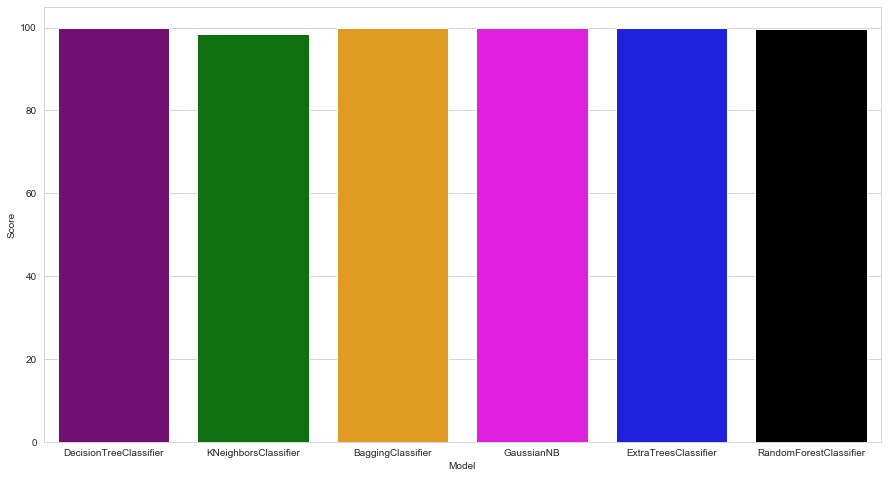

In [47]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [48]:
df.head()

,COUNTRY,ISO3,WHO_REGION,MASKS,TRAVEL,GATHERINGS,SCHOOLS,BUSINESSES,MOVEMENTS,GLOBAL_INDEX,...,Mask wearing; Restrictions on movement and stay at home orders; Adaptation or closure of schools; Limits and restrictions on public and private gatherings,Mask wearing; Restrictions on movement and stay at home orders; Limits and restrictions on public and private gatherings,Restrictions on movement and stay at home orders,Restrictions on movement and stay at home orders; Adaptation or closure of businesses,Restrictions on movement and stay at home orders; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings,Restrictions on movement and stay at home orders; Adaptation or closure of schools,Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses,Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings,Restrictions on movement and stay at home orders; Adaptation or closure of schools; Limits and restrictions on public and private gatherings,Restrictions on movement and stay at home orders; Limits and restrictions on public and private gatherings
0,Yemen,230,2,0,100,30,25,13,80,41,...,0,0,0,0,0,0,0,0,0,0
1,Belarus,24,3,67,0,25,25,13,40,28,...,0,0,0,0,0,0,0,0,0,0
2,Egypt,59,2,100,33,50,25,67,100,62,...,0,0,0,0,0,0,0,0,0,0
3,Uzbekistan,217,3,100,100,25,75,67,40,68,...,0,0,0,0,0,0,0,0,0,0
4,Finland,64,3,47,100,5,25,67,20,44,...,0,0,0,0,0,0,0,0,0,0


In [49]:
import sklearn.cluster as cluster
from sklearn.cluster import KMeans

In [56]:
kmns=cluster.KMeans(n_clusters=5)


In [57]:
kmns.fit(df[['WHO_REGION','MASKS']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [58]:
kmns.cluster_centers_

array([[  1.93926874, 100.        ],
       [  2.28967766,   0.33449155],
       [  2.58083504,  67.        ],
       [  1.79011842,  34.70355247],
       [  2.23865723,  80.        ]])

In [59]:
df['WHO_REGION  by  MASKS']=kmns.labels_

In [60]:
k_range=range(1,15)
wss=[]

In [61]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['WHO_REGION','MASKS']])
    wss.append(km.inertia_)

In [62]:
wss

[297336857.3477466,
 20346088.510850053,
 9029045.80901382,
 1594627.1491201983,
 840692.8685705063,
 602183.7398899625,
 395218.7040862554,
 244727.23499187178,
 134164.48857761777,
 107617.07577382278,
 86904.93427266236,
 65661.48606607095,
 52922.712702821904,
 43078.58858156525]

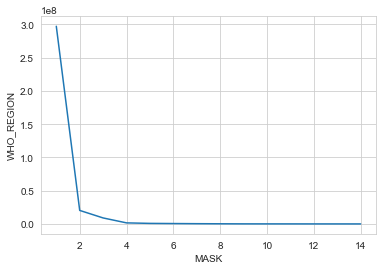

In [63]:
plt.ylabel('WHO_REGION')
plt.xlabel('MASK')
plt.plot(k_range,wss)

In [64]:
df.columns

Index(['COUNTRY', 'ISO3', 'WHO_REGION', 'MASKS', 'TRAVEL', 'GATHERINGS',
       'SCHOOLS', 'BUSINESSES', 'MOVEMENTS', 'GLOBAL_INDEX',
       'Adaptation or closure of businesses',
       'Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Adaptation or closure of schools',
       'Adaptation or closure of schools; Adaptation or closure of businesses',
       'Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Adaptation or closure of schools; Limits and restrictions on public and private gatherings',
       'International travel restrictions (entry restrictions, quarantining and testing)',
       'International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of businesses',
       'International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of businesses; Limits a

In [65]:
kmns=cluster.KMeans(n_clusters=5)

In [66]:
kmns=kmns.fit(df[['WHO_REGION','TRAVEL']])

In [67]:
kmns.cluster_centers_

array([[ 2.15832141e+00,  1.00000000e+02],
       [ 2.05106915e+00, -2.26521024e-11],
       [ 1.84342359e+00,  6.73342409e+01],
       [ 2.15508492e+00,  3.37028216e+01],
       [ 2.49363829e+00,  1.70000000e+01]])

In [68]:
df['WHO_REGION by TRAVEL']=kmns.labels_

In [69]:
k_range=range(1,15)
wss=[]

In [71]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['WHO_REGION','TRAVEL']])
    wss.append(km.inertia_)

In [72]:
wss

[241337639.97668868,
 28391685.031104587,
 11159013.548260069,
 2435178.6363669373,
 675435.7649452528,
 505906.2208308138,
 356996.5468307041,
 250473.36446710638,
 190322.1374354249,
 133410.0212149742,
 104037.74910855934,
 81101.21141336614,
 60969.96505268008,
 49711.920292366376]

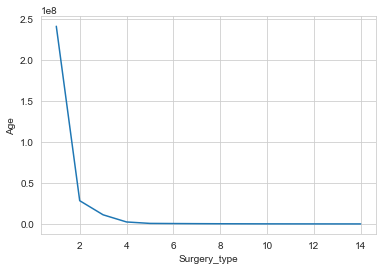

In [73]:
plt.ylabel('Age')
plt.xlabel('Surgery_type')
plt.plot(k_range,wss)

In [74]:
kmns=cluster.KMeans(n_clusters=5)

In [75]:
kmns=kmns.fit(df[['WHO_REGION','GATHERINGS']])

In [76]:
kmns.cluster_centers_

array([[4.14733824e+00, 3.61666253e-12],
       [2.15574678e+00, 2.52664512e+01],
       [1.90156923e+00, 5.00000000e+01],
       [2.81963735e+00, 5.00000000e+00],
       [7.26034438e-01, 3.86179977e-12]])

In [77]:
df['WHO_REGION by GATHERINGS']=kmns.labels_

In [78]:
k_range=range(1,15)
wss=[]

In [80]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['WHO_REGION','GATHERINGS']])
    wss.append(km.inertia_)

In [81]:
wss

[50152294.352672875,
 12917315.505538536,
 683278.4710717252,
 467953.840519409,
 341994.4009939936,
 237484.411013986,
 169756.49600497124,
 104933.02120475235,
 81442.4315370013,
 64051.59298280426,
 50824.653555603436,
 38913.20208018741,
 32890.557989424924,
 28747.678526762968]

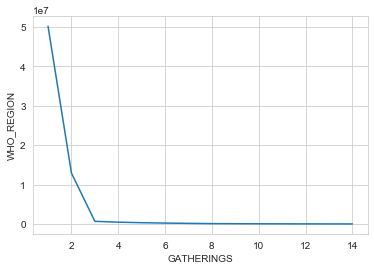

In [82]:
plt.ylabel('WHO_REGION')
plt.xlabel('GATHERINGS')
plt.plot(k_range,wss)

In [ ]:
kmns=cluster.KMeans(n_clusters=5)

In [83]:
kmns=kmns.fit(df[['WHO_REGION','SCHOOLS']])

In [84]:
kmns.cluster_centers_

array([[ 2.75928641e+00,  7.74254643e+01],
       [ 2.10252106e+00,  2.50568539e+01],
       [ 2.11107034e+00, -5.55999691e-12],
       [ 1.53126110e+00,  1.00000000e+02],
       [ 2.75608297e+00,  5.09284005e+01]])

In [85]:
df['sex by Alberta']=kmns.labels_

In [86]:
k_range=range(1,15)
wss=[]

In [88]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['WHO_REGION','SCHOOLS']])
    wss.append(km.inertia_)

In [89]:
wss

[68812745.29701906,
 22833418.70942511,
 4865215.978082015,
 1679971.818706852,
 468790.03551697894,
 275548.5640632122,
 190598.1714564031,
 145796.2728889752,
 120010.2290234997,
 105202.62297526037,
 83803.1263663329,
 69355.87440660095,
 54258.33674445647,
 44852.94661141524]

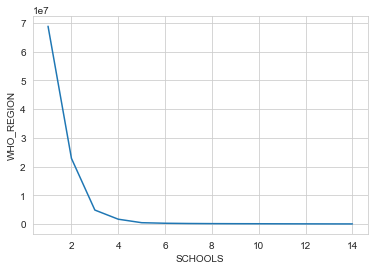

In [90]:
plt.ylabel('WHO_REGION')
plt.xlabel('SCHOOLS')
plt.plot(k_range,wss)

In [91]:
df.head()

,COUNTRY,ISO3,WHO_REGION,MASKS,TRAVEL,GATHERINGS,SCHOOLS,BUSINESSES,MOVEMENTS,GLOBAL_INDEX,...,Restrictions on movement and stay at home orders; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings,Restrictions on movement and stay at home orders; Adaptation or closure of schools,Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses,Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings,Restrictions on movement and stay at home orders; Adaptation or closure of schools; Limits and restrictions on public and private gatherings,Restrictions on movement and stay at home orders; Limits and restrictions on public and private gatherings,WHO_REGION by MASKS,WHO_REGION by TRAVEL,WHO_REGION by GATHERINGS,sex by Alberta
0,Yemen,230,2,0,100,30,25,13,80,41,...,0,0,0,0,0,0,1,0,1,1
1,Belarus,24,3,67,0,25,25,13,40,28,...,0,0,0,0,0,0,2,1,1,1
2,Egypt,59,2,100,33,50,25,67,100,62,...,0,0,0,0,0,0,0,3,2,1
3,Uzbekistan,217,3,100,100,25,75,67,40,68,...,0,0,0,0,0,0,0,0,1,0
4,Finland,64,3,47,100,5,25,67,20,44,...,0,0,0,0,0,0,3,0,3,1


In [92]:
df.columns

Index(['COUNTRY', 'ISO3', 'WHO_REGION', 'MASKS', 'TRAVEL', 'GATHERINGS',
       'SCHOOLS', 'BUSINESSES', 'MOVEMENTS', 'GLOBAL_INDEX',
       'Adaptation or closure of businesses',
       'Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Adaptation or closure of schools',
       'Adaptation or closure of schools; Adaptation or closure of businesses',
       'Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Adaptation or closure of schools; Limits and restrictions on public and private gatherings',
       'International travel restrictions (entry restrictions, quarantining and testing)',
       'International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of businesses',
       'International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of businesses; Limits a

In [93]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [94]:
man=MinMaxScaler()
feat=['ISO3', 'WHO_REGION', 'MASKS', 'TRAVEL', 'GATHERINGS',
       'SCHOOLS', 'BUSINESSES', 'MOVEMENTS', 'GLOBAL_INDEX',
       'Adaptation or closure of businesses',
       'Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Adaptation or closure of schools',
       'Adaptation or closure of schools; Adaptation or closure of businesses',
       'Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Adaptation or closure of schools; Limits and restrictions on public and private gatherings',
       'International travel restrictions (entry restrictions, quarantining and testing)',
       'International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of businesses',
       'International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of schools',
       'International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of schools; Adaptation or closure of businesses',
       'International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of schools; Limits and restrictions on public and private gatherings',
       'International travel restrictions (entry restrictions, quarantining and testing); Limits and restrictions on public and private gatherings',
       'International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders',
       'International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Adaptation or closure of businesses',
       'International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Adaptation or closure of schools',
       'International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses',
       'International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Adaptation or closure of schools; Limits and restrictions on public and private gatherings',
       'International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Limits and restrictions on public and private gatherings',
       'Limits and restrictions on public and private gatherings',
       'Mask wearing', 'Mask wearing; Adaptation or closure of businesses',
       'Mask wearing; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Mask wearing; Adaptation or closure of schools',
       'Mask wearing; Adaptation or closure of schools; Adaptation or closure of businesses',
       'Mask wearing; Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Mask wearing; Adaptation or closure of schools; Limits and restrictions on public and private gatherings',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing)',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of businesses',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of schools',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of schools; Adaptation or closure of businesses',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of schools; Limits and restrictions on public and private gatherings',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Limits and restrictions on public and private gatherings',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Adaptation or closure of businesses',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Adaptation or closure of schools',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Adaptation or closure of schools; Limits and restrictions on public and private gatherings',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Limits and restrictions on public and private gatherings',
       'Mask wearing; Limits and restrictions on public and private gatherings',
       'Mask wearing; Restrictions on movement and stay at home orders',
       'Mask wearing; Restrictions on movement and stay at home orders; Adaptation or closure of businesses',
       'Mask wearing; Restrictions on movement and stay at home orders; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Mask wearing; Restrictions on movement and stay at home orders; Adaptation or closure of schools',
       'Mask wearing; Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses',
       'Mask wearing; Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Mask wearing; Restrictions on movement and stay at home orders; Adaptation or closure of schools; Limits and restrictions on public and private gatherings',
       'Mask wearing; Restrictions on movement and stay at home orders; Limits and restrictions on public and private gatherings',
       'Restrictions on movement and stay at home orders',
       'Restrictions on movement and stay at home orders; Adaptation or closure of businesses',
       'Restrictions on movement and stay at home orders; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Restrictions on movement and stay at home orders; Adaptation or closure of schools',
       'Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses',
       'Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Restrictions on movement and stay at home orders; Adaptation or closure of schools; Limits and restrictions on public and private gatherings',
       'Restrictions on movement and stay at home orders; Limits and restrictions on public and private gatherings',
       'WHO_REGION  by  MASKS', 'WHO_REGION by TRAVEL',
       'WHO_REGION by GATHERINGS', 'sex by Alberta']
df[feat]=man.fit_transform(df[feat])
df[feat]

,ISO3,WHO_REGION,MASKS,TRAVEL,GATHERINGS,SCHOOLS,BUSINESSES,MOVEMENTS,GLOBAL_INDEX,Adaptation or closure of businesses,...,Restrictions on movement and stay at home orders; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings,Restrictions on movement and stay at home orders; Adaptation or closure of schools,Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses,Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings,Restrictions on movement and stay at home orders; Adaptation or closure of schools; Limits and restrictions on public and private gatherings,Restrictions on movement and stay at home orders; Limits and restrictions on public and private gatherings,WHO_REGION by MASKS,WHO_REGION by TRAVEL,WHO_REGION by GATHERINGS,sex by Alberta
0,0.987124,0.4,0.00,1.00,0.6,0.25,0.097744,0.8,0.465909,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.00,0.25,0.25
1,0.103004,0.6,0.67,0.00,0.5,0.25,0.097744,0.4,0.318182,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.25,0.25,0.25
2,0.253219,0.4,1.00,0.33,1.0,0.25,0.503759,1.0,0.704545,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.75,0.50,0.25
3,0.931330,0.6,1.00,1.00,0.5,0.75,0.503759,0.4,0.772727,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.25,0.00
4,0.274678,0.6,0.47,1.00,0.1,0.25,0.503759,0.2,0.500000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.00,0.75,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142501,0.995708,0.0,1.00,0.17,0.5,1.00,0.248120,0.2,0.556818,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,0.25,0.75
142502,1.000000,0.0,0.00,1.00,1.0,0.25,0.503759,0.6,0.568182,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.00,0.50,0.25
142503,1.000000,0.0,0.00,1.00,1.0,0.25,0.503759,0.6,0.568182,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.00,0.50,0.25
142504,1.000000,0.0,0.00,1.00,1.0,0.25,0.503759,0.6,0.568182,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.00,0.50,0.25


In [95]:
std=StandardScaler()
feat=['ISO3', 'WHO_REGION', 'MASKS', 'TRAVEL', 'GATHERINGS',
       'SCHOOLS', 'BUSINESSES', 'MOVEMENTS', 'GLOBAL_INDEX',
       'Adaptation or closure of businesses',
       'Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Adaptation or closure of schools',
       'Adaptation or closure of schools; Adaptation or closure of businesses',
       'Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Adaptation or closure of schools; Limits and restrictions on public and private gatherings',
       'International travel restrictions (entry restrictions, quarantining and testing)',
       'International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of businesses',
       'International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of schools',
       'International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of schools; Adaptation or closure of businesses',
       'International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of schools; Limits and restrictions on public and private gatherings',
       'International travel restrictions (entry restrictions, quarantining and testing); Limits and restrictions on public and private gatherings',
       'International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders',
       'International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Adaptation or closure of businesses',
       'International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Adaptation or closure of schools',
       'International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses',
       'International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Adaptation or closure of schools; Limits and restrictions on public and private gatherings',
       'International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Limits and restrictions on public and private gatherings',
       'Limits and restrictions on public and private gatherings',
       'Mask wearing', 'Mask wearing; Adaptation or closure of businesses',
       'Mask wearing; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Mask wearing; Adaptation or closure of schools',
       'Mask wearing; Adaptation or closure of schools; Adaptation or closure of businesses',
       'Mask wearing; Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Mask wearing; Adaptation or closure of schools; Limits and restrictions on public and private gatherings',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing)',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of businesses',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of schools',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of schools; Adaptation or closure of businesses',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Adaptation or closure of schools; Limits and restrictions on public and private gatherings',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Limits and restrictions on public and private gatherings',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Adaptation or closure of businesses',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Adaptation or closure of schools',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Adaptation or closure of schools; Limits and restrictions on public and private gatherings',
       'Mask wearing; International travel restrictions (entry restrictions, quarantining and testing); Restrictions on movement and stay at home orders; Limits and restrictions on public and private gatherings',
       'Mask wearing; Limits and restrictions on public and private gatherings',
       'Mask wearing; Restrictions on movement and stay at home orders',
       'Mask wearing; Restrictions on movement and stay at home orders; Adaptation or closure of businesses',
       'Mask wearing; Restrictions on movement and stay at home orders; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Mask wearing; Restrictions on movement and stay at home orders; Adaptation or closure of schools',
       'Mask wearing; Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses',
       'Mask wearing; Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Mask wearing; Restrictions on movement and stay at home orders; Adaptation or closure of schools; Limits and restrictions on public and private gatherings',
       'Mask wearing; Restrictions on movement and stay at home orders; Limits and restrictions on public and private gatherings',
       'Restrictions on movement and stay at home orders',
       'Restrictions on movement and stay at home orders; Adaptation or closure of businesses',
       'Restrictions on movement and stay at home orders; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Restrictions on movement and stay at home orders; Adaptation or closure of schools',
       'Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses',
       'Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings',
       'Restrictions on movement and stay at home orders; Adaptation or closure of schools; Limits and restrictions on public and private gatherings',
       'Restrictions on movement and stay at home orders; Limits and restrictions on public and private gatherings',
       'WHO_REGION  by  MASKS', 'WHO_REGION by TRAVEL',
       'WHO_REGION by GATHERINGS', 'sex by Alberta']
df[feat]=std.fit_transform(df[feat])
df[feat]

,ISO3,WHO_REGION,MASKS,TRAVEL,GATHERINGS,SCHOOLS,BUSINESSES,MOVEMENTS,GLOBAL_INDEX,Adaptation or closure of businesses,...,Restrictions on movement and stay at home orders; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings,Restrictions on movement and stay at home orders; Adaptation or closure of schools,Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses,Restrictions on movement and stay at home orders; Adaptation or closure of schools; Adaptation or closure of businesses; Limits and restrictions on public and private gatherings,Restrictions on movement and stay at home orders; Adaptation or closure of schools; Limits and restrictions on public and private gatherings,Restrictions on movement and stay at home orders; Limits and restrictions on public and private gatherings,WHO_REGION by MASKS,WHO_REGION by TRAVEL,WHO_REGION by GATHERINGS,sex by Alberta
0,1.680253,-0.073604,-1.160309,0.931370,0.470655,0.036406,-0.767670,1.002628,0.061639,-0.031693,...,-0.035464,-0.029984,-0.034559,-0.085242,-0.028542,-0.019827,-0.019606,-0.853106,-0.624022,-0.527268
1,-1.369369,0.520303,0.307475,-1.500655,0.203048,0.036406,-0.767670,-0.062480,-0.571351,-0.031693,...,-0.035464,-0.029984,-0.034559,-0.085242,-0.028542,-0.019827,0.809703,-0.115287,-0.624022,-0.527268
2,-0.851229,-0.073604,1.030414,-0.698087,1.541083,0.036406,1.038841,1.535181,1.084161,-0.031693,...,-0.035464,-0.029984,-0.034559,-0.085242,-0.028542,-0.019827,-0.848914,1.360353,0.144205,-0.527268
3,1.487801,0.520303,1.030414,0.931370,0.203048,2.318486,1.038841,-0.062480,1.376310,-0.031693,...,-0.035464,-0.029984,-0.034559,-0.085242,-0.028542,-0.019827,-0.848914,-0.853106,-0.624022,-1.830901
4,-0.777209,0.520303,-0.130669,0.931370,-0.867380,0.036406,1.038841,-0.595034,0.207713,-0.031693,...,-0.035464,-0.029984,-0.034559,-0.085242,-0.028542,-0.019827,1.639011,-0.853106,0.912432,-0.527268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142501,1.709861,-1.261417,1.030414,-1.087210,0.203048,3.459526,-0.098592,-0.595034,0.451171,-0.031693,...,-0.035464,-0.029984,-0.034559,-0.085242,-0.028542,-0.019827,-0.848914,2.098172,-0.624022,2.079999
142502,1.724665,-1.261417,-1.160309,0.931370,1.541083,0.036406,1.038841,0.470074,0.499862,-0.031693,...,-0.035464,-0.029984,-0.034559,-0.085242,-0.028542,-0.019827,-0.019606,-0.853106,0.144205,-0.527268
142503,1.724665,-1.261417,-1.160309,0.931370,1.541083,0.036406,1.038841,0.470074,0.499862,-0.031693,...,-0.035464,-0.029984,-0.034559,-0.085242,-0.028542,-0.019827,-0.019606,-0.853106,0.144205,-0.527268
142504,1.724665,-1.261417,-1.160309,0.931370,1.541083,0.036406,1.038841,0.470074,0.499862,-0.031693,...,-0.035464,-0.029984,-0.034559,-0.085242,-0.028542,-0.019827,-0.019606,-0.853106,0.144205,-0.527268
